# Geração do Arquivo .docx para a Gráfica


## Inicialização do Código

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import re
import numpy as np
import os

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
arquivo_lecom = '/content/drive/MyDrive/Dados/Dados Catálogo Empresas Espaciais/dados_principais_lecom.xlsx'
dados = pd.read_excel(arquivo_lecom, index_col=0, header=2)

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
dados['Nome da Empresa'].sort_values().to_frame()

,Nome da Empresa
#Processo,
733.0,"ACOSTA AEROESPACO, ENGENHARIA E SERVICOS ESPEC..."
578.0,ACRUX LTDA
863.0,AEL SISTEMAS S.A
844.0,AEL SISTEMAS S.A
667.0,AEL SISTEMAS S.A
...,...
640.0,WIPRO DO BRASIL INDUSTRIAL LTDA
569.0,aaaaaaaaaaa
796.0,aaaaaaaaaaaa


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 96 entries, 869.0 to 530.0
Data columns (total 90 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   Tipo de processo                                    96 non-null     object        
 1   Aberto por                                          96 non-null     object        
 2   Abertura                                            96 non-null     datetime64[ns]
 3   Status do Processo                                  96 non-null     object        
 4   Etapa atual                                         96 non-null     object        
 5   Tipo da Etapa Atual                                 96 non-null     object        
 6   Ajustes solicitados                                 1 non-null      object        
 7   Logo da Empresa                                     64 non-null     object        
 8   Agr

In [ ]:
dados.loc[dados['Nome do solicitante'] == 'ALESSANDRO AVANCINI MOTTA DE SOUZA']

,Tipo de processo,Aberto por,Abertura,Status do Processo,Etapa atual,Tipo da Etapa Atual,Ajustes solicitados,Logo da Empresa,Agricultura,Aviação,...,Navegação por Satélite,Observação da Terra,Telecomunicação,Tamanho da Empresa,Planeja receber incentivos?,Informe o(s) incentivo(s) que recebe atualmente,Selecione o(s) tipo(s) de investimento(s),Informe o(s) tipo(s) incentivo(s) que recebeu,Lançadores,Manufatura
#Processo,,,,,,,,,,,,,,,,,,,,,
796.0,Catálogo das Empresas Espaciais Brasileiras,Cidadão,2022-10-05 12:03:10,Em andamento,AJUSTES_DE_SOLICITACAO_I,Normal,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
794.0,Catálogo das Empresas Espaciais Brasileiras,Cidadão,2022-10-05 11:55:28,Rejeitado,CANCELAR_SOLICITACAO,Final,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
791.0,Catálogo das Empresas Espaciais Brasileiras,Cidadão,2022-10-05 09:36:08,Rejeitado,CANCELAR_SOLICITACAO,Final,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
603.0,Catálogo das Empresas Espaciais Brasileiras,Cidadão,2022-08-19 09:18:45,Em andamento,AJUSTES_DE_SOLICITACAO_II,Normal,NaN,n_investimentos_por_rodada(1).png:efc27bf6-844...,NaN,Sim,...,NaN,NaN,NaN,Pequena,NaN,NaN,NaN,NaN,NaN,Sim
584.0,Catálogo das Empresas Espaciais Brasileiras,Cidadão,2022-08-15 16:49:03,Rejeitado,SOLICITACAO_REJEITADA,Final,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
569.0,Catálogo das Empresas Espaciais Brasileiras,Cidadão,2022-08-12 09:05:28,Aprovado,SOLICITACAO_ACEITA,Final,NaN,nasa_technology_taxonomy_poster_print_pages-to...,NaN,NaN,...,NaN,NaN,NaN,Startup,NaN,Acorda Brasil,Série A,NaN,NaN,Sim


## Filtrando o DataFrame

(Texto explicativo)

In [ ]:
todos_processos = dados.copy()

cadastros_aceitos = (dados['Etapa atual'] != 'SOLICITACAO_REJEITADA')
cadastros_sem_os_testes = dados['Nome do solicitante'] != 'ALESSANDRO AVANCINI MOTTA DE SOUZA'
cadastros_sem_os_cancelados = dados['Etapa atual'] != 'CANCELAR_SOLICITACAO'
cadastros_sem_os_ajustes = dados['Etapa atual'] != 'AJUSTES_DE_SOLICITACAO_I'


dados = dados[cadastros_aceitos & cadastros_sem_os_testes & cadastros_sem_os_cancelados & cadastros_sem_os_ajustes]

Mas também temos alguns processos repetidos. Vamos considerar o processo mais antigo de cada empresa, e retirar o excedente.

In [ ]:
dados.sort_values('Nome da Empresa')[['Nome da Empresa']]

,Nome da Empresa
#Processo,
733.0,"ACOSTA AEROESPACO, ENGENHARIA E SERVICOS ESPEC..."
578.0,ACRUX LTDA
863.0,AEL SISTEMAS S.A
667.0,AEL SISTEMAS S.A
844.0,AEL SISTEMAS S.A
...,...
658.0,"USIPED CALDERARIA, FERRAMENTARIA, USINAGEM E M..."
691.0,V CARRARA ASSESSORIA
723.0,VILLARES METALS SA


In [ ]:
dados.drop([747,844,667,800], inplace=True)

Assim, terminamos o nosso dataframe filtrado com a quantidade correta de empresas.

In [ ]:
dados['Tipo da Etapa Atual'].value_counts()

Final     59
Normal     7
Name: Tipo da Etapa Atual, dtype: int64

In [ ]:
dados[['Nome da Empresa']]

,Nome da Empresa
#Processo,
869.0,MOOG DO BRASIL CONTROLES LTDA
863.0,AEL SISTEMAS S.A
861.0,VISIONA TECNOLOGIA ESPACIAL S.A.
860.0,NEURON ENGENHARIA E COMERCIO DE EQUIPAMENTOS E...
857.0,MASSUCATO INDUSTRIA E COMERCIO LTDA
...,...
604.0,RSA ENGENHARIA
593.0,"COSTA, ALBINO & LASALVIA SOCIEDADE DE ADVOGADOS"
586.0,FIGWAL TRANSPORTES INTERNACIONAIS LTDA.


## Tratar dados dos Representantes

In [ ]:
def replaceSpacesAndHifens(string: str):
  return string.replace(' ', '_').replace('-','')

In [ ]:
representantes = pd.read_excel(arquivo_lecom, sheet_name='IDT_REPEMRPESA',index_col=0)
representantes.columns = list(map(replaceSpacesAndHifens, representantes.columns))

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
representantes_final = pd.DataFrame("",columns=representantes.columns, 
                                    index=set(representantes.index))

In [ ]:
for row in representantes.itertuples():
  representantes_final.loc[row.Index, 'Nome_do_Representante'] += row.Nome_do_Representante + r' | '
  representantes_final.loc[row.Index, 'Email'] += row.Email + r' | '
  representantes_final.loc[row.Index, 'Telefone_Fixo'] += row.Telefone_Fixo + ' | '

In [ ]:
representantes_final

,Etapa,Nome_do_Representante,Email,Telefone_Fixo
569,,Testinha di Formularilson |,testinha.formularilson@teste.com |,+55 (61) 0000-0000 |
577,,Eduardo Garcia Barboni |,eduardo.barboni@ermatech.com.br |,+55 (12) 3939-1305 |
578,,Oswaldo Barbosa Loureda |,oswaldobl@acruxtech.com.br |,+55 (45) 9849-1000 |
582,,12 98148-6500 |,marceloessado@gmail.com |,+55 (16) 3722-2002 |
584,,wqeqsasdaasdasdas |,asdasasasdd@gmail.com |,+39 (72) 9198-2731 |
...,...,...,...,...
857,,Jefferson Borges da Silva |,jefferson.borges@massucato.com.br |,+55 (19) 3246-0322 |
860,,Claudemir Marcos da Silva |,claudemir.marcos.da.silva@gmail.com |,+55 (12) 3922-4821 |
861,,Visiona Tecnologia Espacial S.A. |,marcelo.feltrin@visionaespacial.com.br |,+12 (99) 7044-286 |
863,,Mauro Luís Medeiros Beirão |,mbeirao@ael.com.br |,+51 (21) 0112-69 |


##  Tratando as Áreas de Atuação

In [ ]:
atuacoes = pd.read_excel(arquivo_lecom, sheet_name='GRD_ATUACAO', index_col=0)
atuacoes = atuacoes[atuacoes['Etapa'] != 'SOLICITACAO_REJEITADA']

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
atuacoes_final = pd.DataFrame('', columns=atuacoes.columns, index = set(atuacoes.index))

for row in atuacoes.itertuples():
  atuacoes_final.loc[row.Index, 'Área'] += row.Área + ', '

atuacoes_final.drop(['Etapa', 'Qual'], axis = 1, inplace=True)
atuacoes_final.columns = ['Área_de_Atuação']

In [ ]:
atuacoes_final.shape

(61, 1)

In [ ]:
dados = dados.join(atuacoes_final)

In [ ]:
dados['Área_de_Atuação']

#Processo
869.0                                                  NaN
863.0                                                  NaN
861.0    Satélites, Aplicações, Software, Serviços, Inf...
860.0                                                  NaN
857.0                                             Outros, 
                               ...                        
604.0    Lançadores, Satélites, Infraestrutura de solo,...
593.0                           Serviços, Outros, Outros, 
586.0                    Satélites, Lançadores, Hardware, 
578.0    Lançadores, Infraestrutura de solo, Serviços, ...
577.0                 Infraestrutura de solo, Lançadores, 
Name: Área_de_Atuação, Length: 66, dtype: object

## Tratando a Coluna "Logos"

In [ ]:
def removingDoubleDots(string: str) -> str:
  try:
    return string.split(':')[0]
  except:
    return np.nan

In [ ]:
dados['Logo da Empresa'] = dados['Logo da Empresa'].apply(removingDoubleDots)

In [ ]:
dados['Logo da Empresa'][pd.notna(dados['Logo da Empresa'])]

#Processo
861.0                          Logotipo_Visiona_72DPI.jpg
857.0                              Logo-PNG-Massucato.png
856.0                                    logo avibras.jpg
849.0                                   Aerocris logo.png
842.0                                        Logo MTS.jpg
826.0                         GMP MARCATTO logo final.png
825.0                                         _5.opto.png
821.0                                      Logo SIATT.PNG
815.0                  Logo_Helmert_Novo_Transparente.png
812.0                                     Logo Jaguar.png
810.0                        logo beta tradicao largo.PNG
809.0                              Logo_GamaTech_Port.jpg
806.0                             marca-AMSK-vertical.jpg
803.0                    Logotipo Bidoia Mello-01 (2).png
786.0                           idea space - logo png.png
779.0                                           logo2.png
776.0                                       logo 2020.PNG
772.

## Tratando os dados de Anexos

In [ ]:
anexos = pd.read_excel(arquivo_lecom, sheet_name='GRD_ANX',index_col=0)

In [ ]:
anexos['Arquivo'] = anexos['Arquivo'].apply(removingDoubleDots)

In [ ]:
anexos_final = pd.DataFrame('', columns=anexos.columns, index=set(anexos.index))

In [ ]:
for row in anexos.itertuples():
  anexos_final.loc[row.Index, 'Arquivo'] += row.Arquivo + ', '

In [ ]:
anexos_final['Arquivo'] = anexos_final['Arquivo'].apply(lambda x: x[:-2])

In [ ]:
anexos_final.drop(['Etapa', 'Descrição'], axis=1, inplace=True)

In [ ]:
dados = dados.join(anexos_final)

In [ ]:
anexos_final

,Arquivo
769,"1.png, 2.png, 4.png, 3.png, 5.png, 6.png, 7.pn..."
770,"DigitalDataRecorder(Amazonia1).JPG, WFI_Electr..."
771,"Arkhe Athena.PNG, Arkhe Data Analysis.png, Ark..."
772,"Doors_Latécoère.jpg, Fuselage_Latécoère.jpg, H..."
776,"Bancada CEU ITA.PNG, brasagem.PNG, 4 estagio.P..."
...,...
630,"46751_01.jpg, 51513_01.jpg, 50700_04.jpg"
763,"foto_ada.PNG, foto_datasat.PNG"
764,"Motor corte_1.jpg, Untitled1.JPG"
766,"Grupo no Pad.jpg, Reunião no CLA.jpg, Reunião ..."


In [ ]:
dados[['Nome da Empresa', 'Arquivo']]

,Nome da Empresa,Arquivo
#Processo,,
869.0,MOOG DO BRASIL CONTROLES LTDA,NaN
863.0,AEL SISTEMAS S.A,NaN
861.0,VISIONA TECNOLOGIA ESPACIAL S.A.,"Visiona - AOCS.jpg, Visiona - Atuação e Capaci..."
860.0,NEURON ENGENHARIA E COMERCIO DE EQUIPAMENTOS E...,NaN
857.0,MASSUCATO INDUSTRIA E COMERCIO LTDA,"Slide3.JPG, Slide4.JPG, Slide5.JPG, Slide6.JPG..."
...,...,...
604.0,RSA ENGENHARIA,Apresentação - Serviços - RSA - 2022_Página_03...
593.0,"COSTA, ALBINO & LASALVIA SOCIEDADE DE ADVOGADOS",CAL Cover aerospace.PNG
586.0,FIGWAL TRANSPORTES INTERNACIONAIS LTDA.,"PROJETO ACS BASE ALCANTERA.PNG, SCIENTIFIC PRO..."


## Tratando os nomes das Imagens

In [ ]:
# TESTE
com_imagens = dados[pd.notna(dados['Arquivo'])][['Nome da Empresa', 'Arquivo']].copy()
lista_de_anexos = anexos.loc[com_imagens.index]['Arquivo']

In [ ]:
lista_de_anexos.value_counts().to_frame()

,Arquivo
1.png,4
5.png,3
3.png,3
4.png,3
2.png,3
...,...
WFI_Electronics(CBERS3&4).JPG,1
WFI_OpticalBench(CBERS3&4).JPG,1
WFI_ThermalTest(CBERS3&4).JPG,1
ThermalAnalysis&MLI.JPG,1


In [ ]:
dados[['Nome da Empresa','Arquivo']]

,Nome da Empresa,Arquivo
#Processo,,
869.0,MOOG DO BRASIL CONTROLES LTDA,NaN
863.0,AEL SISTEMAS S.A,NaN
861.0,VISIONA TECNOLOGIA ESPACIAL S.A.,"Visiona - AOCS.jpg, Visiona - Atuação e Capaci..."
860.0,NEURON ENGENHARIA E COMERCIO DE EQUIPAMENTOS E...,NaN
857.0,MASSUCATO INDUSTRIA E COMERCIO LTDA,"Slide3.JPG, Slide4.JPG, Slide5.JPG, Slide6.JPG..."
...,...,...
604.0,RSA ENGENHARIA,Apresentação - Serviços - RSA - 2022_Página_03...
593.0,"COSTA, ALBINO & LASALVIA SOCIEDADE DE ADVOGADOS",CAL Cover aerospace.PNG
586.0,FIGWAL TRANSPORTES INTERNACIONAIS LTDA.,"PROJETO ACS BASE ALCANTERA.PNG, SCIENTIFIC PRO..."


## Adicionando Produtos e Serviços em Inglês

In [ ]:
!pip install googletrans==3.1.0a0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
def translateText(text: str) -> str:
  from googletrans import Translator
  if type(text) != str:
    return None

  translator = Translator()
  return translator.translate(text, dest='en').text

In [ ]:
dados['Resumo Geral de Produtos e/ou Serviços (Inglês)'] = dados['Resumo Geral de Produtos e/ou Serviços'].apply(translateText)

In [ ]:
dados[['Resumo Geral de Produtos e/ou Serviços', 'Resumo Geral de Produtos e/ou Serviços (Inglês)']]

,Resumo Geral de Produtos e/ou Serviços,Resumo Geral de Produtos e/ou Serviços (Inglês)
#Processo,,
869.0,"MOOG é uma empresa de mecatrônica, que atua na...","MOOG is a mechatronics company, which operates..."
863.0,A AEL Sistemas desenvolveu o Computador de Bor...,AEL Sistemas developed the On-Board Computer f...
861.0,SENSORIAMENTO REMOTO. Atuando como uma integra...,REMOTE SENSING. Acting as a space systems inte...
860.0,A Neuron Eletrônica fornece serviços de engenh...,Neuron Eletrônica provides engineering service...
857.0,Equipamentos modernos e a busca constante por ...,Modern equipment and the constant search for n...
...,...,...
604.0,As quatro áreas de atuação da RSA ENGENHARIA s...,The four areas of action of RSA ENGENHARIA are...
593.0,Nosso escritório oferece serviços jurídicos - ...,Our firm provides legal services - both consul...
586.0,SERVIÇO DE AGENCIAMENTO DE CARGAS DE IMPORTAÇÃ...,"IMPORT AND EXPORT CARGO AGENCY SERVICE BY AIR,..."


## Salvando os dados das Empresas Filtradas

In [ ]:
dados.to_excel('/content/drive/MyDrive/Dados/Dados Catálogo Empresas Espaciais/Empresas_3ed_Catalogo_Filtradas.xlsx',index=False)

# Tratamento das Empresas da 2ª Edição

Precisamos adicionar suas informações nos dataframes "dados" e "representantes_final para que as informações possam ser processadas pelo código já escrito"

## Dataframe Dados

In [ ]:
empresas_antigas_nao_cadastradas = pd.read_excel('/content/drive/MyDrive/Dados/Dados Catálogo Empresas Espaciais/Empresas das 2 ed não cadastradas na 3a.xlsx')

In [ ]:
empresas_antigas_nao_cadastradas = empresas_antigas_nao_cadastradas[empresas_antigas_nao_cadastradas['Já se cadastrou?'].isna()]

n_empresas = empresas_antigas_nao_cadastradas['Nome da empresa'].count()

empresas_antigas_nao_cadastradas = empresas_antigas_nao_cadastradas.reset_index(drop=True)[:n_empresas]

In [ ]:
empresas_antigas_nao_cadastradas

,Nome da empresa,Cidade e Estado,Ponto de contato (para divulgação e eventos),E-mail,Telefone de contato,Site da empresa,Já se cadastrou?,Observação/Ligação
0,ANDRADE GUTIERREZ ENGENHARIA,"São Paulo, SP",Ricardo Newton Fortini Pimentel,ricardo.fortini@agterceiro.com.br,61 3213-5001 | +55 11 5502-2309 telefone no si...,www.andradegutierrez.com,NaN,1 tentativa (29/09) não atende ...
1,BeByte Tecnologia Educacional S/A,"São Paulo, SP",Alexandre Rodrigues de Carvalho,me@alexroger.com,+55 61 99911-2539,www.bebyte.com.br,NaN,1 tentativa (29/09): não atendeu ...
2,CLAMPER INDÚSTRIA & COMÉRCIO S/A,"Lagoa Santa, MG",Wagner Almeida Barbosa,wagner@clamper.com.br,+55 31 3689-9500,www.clamper.com.br,NaN,1 tentativa (29/09) Falei com Rodrigo Maia e p...
3,Grauna Aerospace Ltda.,"São José dos Campos, SP",IRINEU CARPINI FILHO,gepack@uol.com.br/ contato@graunaaerospace.com...,12 3221-3500/site:12 3221-3462,www.graunaaerospace.com.br,NaN,1 tentativa (29/09):não atende ...
4,HOMEM DO ESPAÇO\n,"Nova Friburgo, RJ",Reginaldo Miranda Junior,homemdoespacobr@gmail.com,+55 22 99926-57690,www.homemdoespaco.com,NaN,1 tentativa (29/09): não atende ...
5,Innalogics Sistemas Computacionais Ltda.,"Florianópolis, SC",Gabriel Mariano Marcelino,gabriel.mm8@gmail.com,+ 55 48 99165-1971,www.innalogics.com,NaN,1 tentativa (29/09): não atende ...
6,TROYA,São José dos Campos – SP,Francilio Graciano,troya@troya.ind.br,+55 12 3935-4100,www.troya.ind.br,NaN,1 tentativa (29/09): não atende ...
7,VOLUDI,"Caçapava, SP",Marcus Moura,marcus.moura@voludi.eng.br/contato@voludi.eng.br,12 99685-2346 telefone que está no site: (12)3...,www.voludi.com.br,NaN,1 tentativa (29/09): não atende ...
8,WIKKI,"Rio de Janeiro, RJ",Rafael Campos Henriques (não trabalha mais na ...,antonio.samel@wikki.com.br/jessica.silva@wikki...,21 3733-1801/ 1802 / 1804 - (21) 98889-9444,www.wikki.com.br,NaN,1 tentativa (29/09): não atende ...


In [ ]:
empresas_antigas_nao_cadastradas = list(empresas_antigas_nao_cadastradas['Nome da empresa'])

In [ ]:
empresas_antigas = pd.read_excel('/content/drive/MyDrive/Dados/Dados Abertos - Catálogo 2ª Edição/Compilado - dados abertos catalogo da industria 2020-2021.xlsx')
empresas_antigas = empresas_antigas[[True if empresa in empresas_antigas_nao_cadastradas else False for empresa in empresas_antigas['Nome da empresa']]]

Vamos criar um dataframe do modelo atual para preencher os dados antigos

In [ ]:
novo_modelo = pd.DataFrame(columns=dados.columns)
empresas_antigas.set_index('Nome da empresa', drop=True, inplace=True)

Esse dataframe se iguala ao "dados"

In [ ]:
for empresa in empresas_antigas.index:
  linha_do_dataframe = pd.DataFrame(np.nan, index=[0], columns=dados.columns)
  linha_do_dataframe.loc[0,'Nome da Empresa'] = empresa
  linha_do_dataframe.loc[0,'Município'] = empresas_antigas.loc[empresa, 'Cidade e Estado']
  linha_do_dataframe.loc[0,'Logradouro'] = empresas_antigas.loc[empresa, 'Endereço']
  linha_do_dataframe.loc[0,'Descrição Geral da Atuação da Empresa (Português)'] = empresas_antigas.loc[empresa, 'Descrição da empresa (português)']
  linha_do_dataframe.loc[0,'Descrição Geral da Atuação da Empresa (Inglês)'] = empresas_antigas.loc[empresa, 'Descrição da empresa (inglês)']
  linha_do_dataframe.loc[0,'Resumo Geral de Produtos e/ou Serviços'] = empresas_antigas.loc[empresa, 'Produtos e serviços (português)']
  linha_do_dataframe.loc[0,'Resumo Geral de Produtos e/ou Serviços (Inglês)'] = empresas_antigas.loc[empresa, 'Produtos e serviços (inglês)']
  linha_do_dataframe.loc[0,'Nome_do_Representante'] = empresas_antigas.loc[empresa, 'Ponto de contato (para divulgação e eventos)']
  linha_do_dataframe.loc[0,'Site'] = empresas_antigas.loc[empresa, 'Site da empresa']
  linha_do_dataframe.loc[0,'Slogan da Empresa'] = empresas_antigas.loc[empresa, 'Slogan da empresa']

  novo_modelo = pd.concat([novo_modelo, linha_do_dataframe], axis=0, ignore_index=True)

In [ ]:
#teste log
novo_modelo.dropna(axis=1)

,Descrição Geral da Atuação da Empresa (Português),Descrição Geral da Atuação da Empresa (Inglês),Slogan da Empresa,Logradouro,Município,Nome da Empresa,Site,Resumo Geral de Produtos e/ou Serviços,Resumo Geral de Produtos e/ou Serviços (Inglês),Nome_do_Representante
0,Andrade Gutierrez Engenharia é uma empreiteira...,Andrade Gutierrez Engenharia is a Brazilian ge...,Engenharia,"Av. da Nações Unidas, 12.495, 50 andar, Brooklin","São Paulo, SP",ANDRADE GUTIERREZ ENGENHARIA,www.andradegutierrez.com,A AGE possui uma sólida governança corporativa...,"AGE has a solid corporate governance, managed ...",Ricardo Newton Fortini Pimentel
1,A BeByte tem como missão preparar um milhão de...,BeByte’s mission is to prepare one million chi...,Preparar 1 milhão de jovens para o futuro,"Rua Humberto I, 348","São Paulo, SP",BeByte Tecnologia Educacional S/A,www.bebyte.com.br,Curso de robótica espacial pra jovens: O proje...,Space robotics course for young people: The Sp...,Alexandre Rodrigues de Carvalho
2,"Founded in 1991, CLAMPER is a Brazilian compan...","Founded in 1991, CLAMPER is a Brazilian compan...",Líder e especialista em DPS,"Rodovia LMG-800, km 1, 128 - Distrito Industrial","Lagoa Santa, MG",CLAMPER INDÚSTRIA & COMÉRCIO S/A,www.clamper.com.br,Referência mundial quando o assunto é DPS para...,Global reference when it comes to SPD for prot...,Wagner Almeida Barbosa
3,"Graúna Aerospace LTDA, fundada em 1990, atua n...","Graúna Aerospace LTDA, founded in 1990, operat...",Compliance com os padrões,"Rua Januaria, 1100","São José dos Campos, SP",Grauna Aerospace Ltda.,www.graunaaerospace.com.br,Usinagem: Expertise na fabricação de peças usi...,Machining: Expertise in the manufacture of mac...,IRINEU CARPINI FILHO
4,Empresa de divulgação da História da Exploraçã...,The company is specialised the History of Spac...,Divulgação científica com ênfase na exatidão t...,Rua Aristao Pinto 112 - Centro,"Nova Friburgo, RJ",HOMEM DO ESPAÇO\n,www.homemdoespaco.com,Produz renderizações 3D de foguetes e satélite...,Produces 3D renderings of rockets and satellit...,Reginaldo Miranda Junior
5,Foi criada em 2004 como uma spin-off do GSE da...,It was created in 2004 as a spin-off of the GS...,Innovation and logics,"Rua Dom Jaime Câmara, 170","Florianópolis, SC",Innalogics Sistemas Computacionais Ltda.,www.innalogics.com,INL100 - Computador de bordo para micro e nano...,INL100 - On-Board computer for micro and nanos...,Gabriel Mariano Marcelino
6,A TROYA é capaz de atender as mais diversas in...,TROYA is able to serve several industries with...,-,"Av. Cesare Mansueto Giulio Lattes, 501",São José dos Campos – SP,TROYA,www.troya.ind.br,DESENVOLVIMENTO E PRODUÇÃO DE FERRAMENTAL Dese...,TOOLING DEVELOPMENT AND PRODUCTION We develop ...,Francilio Graciano
7,Voludi é uma empresa de Engenharia e Manufatur...,Voludi is an Engineering and Manufacturing com...,"Atender melhor, para atender sempre!",ROD. João do Amaral Gurgel Km 4.800 – Piedade ...,"Caçapava, SP",VOLUDI,www.voludi.com.br,"Especializada no desenvolvimento de soluções, ...","Specialized in solutions development, Turn Key...",Marcus Moura
8,A WIKKI BRASIL acredita no compartilhamento de...,WIKKI BRASIL believes in knowledge sharing and...,Resolvemos problemas de engenharia compartilha...,"Paulo Emídio Barbosa, 485. CETIC, Sala 305","Rio de Janeiro, RJ",WIKKI,www.wikki.com.br,• Consultoria em projeto de engenharia aeroesp...,• Aerospace engineering design consultancy We ...,Rafael Campos Henriques


As modificações a seguir preparam para escrever no corpo do catálogo

In [ ]:
novo_modelo.fillna('', axis='index', inplace=True)
novo_modelo['Área_de_Atuação'] = np.nan
novo_modelo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 94 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Tipo de processo                                    9 non-null      object 
 1   Aberto por                                          9 non-null      object 
 2   Abertura                                            9 non-null      object 
 3   Status do Processo                                  9 non-null      object 
 4   Etapa atual                                         9 non-null      object 
 5   Tipo da Etapa Atual                                 9 non-null      object 
 6   Ajustes solicitados                                 9 non-null      object 
 7   Logo da Empresa                                     9 non-null      object 
 8   Agricultura                                         9 non-null      object 
 9   Avi

# Gerando o Docx

### Inicializando os Parâmetros

In [ ]:
!pip install python-docx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import docx
from docx.shared import Inches

In [ ]:
doc = docx.Document()

In [ ]:
doc_para = doc.add_paragraph()

In [ ]:
dados_para_doc = pd.concat([dados, novo_modelo])

### Índice do Documento

O Seguinte código escreve o índice no doc

In [ ]:
areas = sorted(atuacoes['Área'].unique())
areas.remove('Outros')

In [ ]:
doc_para.add_run('ÍNDICE:\n\n').bold = True

for area in areas:
  filtro_atuacao = atuacoes[atuacoes['Área'] == area]
  empresas_atuacao = dados_para_doc[['Nome da Empresa']].join(filtro_atuacao['Área']).dropna()

  doc_para.add_run(f'-> {area.upper()} \n').bold = True
  
  for empresa in empresas_atuacao['Nome da Empresa'].sort_values():
    doc_para.add_run(f'\t- {empresa.upper()}\n')

  doc_para.add_run('\n')

Temos quase todas as categorias do catálogo, mas agora precisamos colocar as empresas com a Área de Atuação "Outros". Inicialmente, vamos capturar as empresas que cadastrara, outra área de atuação

In [ ]:
atuacoes_outros = atuacoes[atuacoes['Área'] == 'Outros'].index
lista_empresas_area_atuacao_outros = dados.loc[atuacoes_outros, 'Nome da Empresa'].drop_duplicates()

Contudo, as empresas que não completaram as duas fases do cadastros não tiveram a oportunidade de selecionar a área de atuação, portanto elas também serão colocadas dentro de "Outros"

In [ ]:
for idx_empresa in dados_para_doc.index:
  if pd.isna(dados_para_doc.loc[idx_empresa,'Área_de_Atuação']):
    lista_empresas_area_atuacao_outros[idx_empresa] = dados_para_doc.loc[idx_empresa, 'Nome da Empresa']

In [ ]:
lista_empresas_area_atuacao_outros.sort_values(inplace=True)

Agora, salvando no documento o seguinte índice

In [ ]:
doc_para.add_run(f'-> OUTROS \n').bold = True

for empresa in lista_empresas_area_atuacao_outros:
  doc_para.add_run(f'\t- {empresa.upper()}\n')

doc_para.add_run('\n')

### Corpo do Texto

O Seguinte código escreve o corpo do texto

In [ ]:
caminho_imagens = '/content/drive/MyDrive/Dados/Dados Catálogo Empresas Espaciais/Imagens/'

dados_para_corpo = dados_para_doc.sort_values('Nome da Empresa')

doc_para.add_run('\n')
for i, data in dados_para_corpo.iterrows():  
  doc_para.add_run('NOME DA EMPRESA: ').bold = True
  doc_para.add_run(f"{data['Nome da Empresa']}")
  doc_para.add_run("\n")

  # Aqui vai entrar a logo
  try:
    doc_para.add_run().add_picture(caminho_imagens+data['Logo da Empresa'], width=Inches(2))
    doc_para.add_run("\n\n")
  except:
    pass

  doc_para.add_run('Slogan: ').bold = True
  doc_para.add_run(f"{data['Slogan da Empresa']}")
  doc_para.add_run("\n")

  doc_para.add_run('Cidade e Estado: ').bold = True
  doc_para.add_run(f"{data['Município']}, {data['UF']}")
  doc_para.add_run("\n")

  try:
    representantes_final.loc[i, 'Nome_do_Representante']
    doc_para.add_run('Contato: ').bold = True
    doc_para.add_run(f"{representantes_final.loc[i, 'Nome_do_Representante'][:-2]}")
    doc_para.add_run("\n")
  except:
    doc_para.add_run('Contato: ').bold = True
    doc_para.add_run(f"{empresas_antigas.loc[data['Nome da Empresa'],'Ponto de contato (para divulgação e eventos)']}")
    doc_para.add_run("\n")

  try:
    representantes_final.loc[i, 'Email']
    doc_para.add_run('E-mail: ').bold = True
    doc_para.add_run(f"{representantes_final.loc[i, 'Email'][:-2]}")
    doc_para.add_run("\n")
  except:
    doc_para.add_run('E-mail: ').bold = True
    doc_para.add_run(f"{empresas_antigas.loc[data['Nome da Empresa'],'E-mail']}")
    doc_para.add_run("\n")

  try:
    representantes_final.loc[i, 'Telefone_Fixo']
    doc_para.add_run('Telefone: ').bold = True
    doc_para.add_run(f"{representantes_final.loc[i, 'Telefone_Fixo'][:-2]}")
    doc_para.add_run("\n")
  except:
    doc_para.add_run('Telefone: ').bold = True
    doc_para.add_run(f"{empresas_antigas.loc[data['Nome da Empresa'],'Telefone de contato']}")
    doc_para.add_run("\n")

  doc_para.add_run('Endereço: ').bold = True
  doc_para.add_run(f"{data['Logradouro']}, {data['Número']}, {data['Complemento']+', ' if pd.notna(data['Complemento']) else ''}{data['Bairro']}")
  doc_para.add_run("\n")

  doc_para.add_run('Área de Atuação: ').bold = True
  doc_para.add_run(f"{data['Área_de_Atuação'][:-2] if pd.notna(data['Área_de_Atuação']) else ''}")
  doc_para.add_run("\n")

  doc_para.add_run('Site: ').bold = True
  doc_para.add_run(f"{data['Site']}")
  doc_para.add_run("\n\n")

  doc_para.add_run('SOBRE / ABOUT: \n').bold = True
  doc_para.add_run(f"{data['Descrição Geral da Atuação da Empresa (Português)']}")
  doc_para.add_run("\n\n")
  doc_para.add_run(f"{data['Descrição Geral da Atuação da Empresa (Inglês)']}").italic = True
  doc_para.add_run("\n\n")

  doc_para.add_run('PRODUTOS E SERVIÇOS / PRODUCTS AND SERVICES: \n').bold = True
  doc_para.add_run(f"{data['Resumo Geral de Produtos e/ou Serviços']}")
  doc_para.add_run("\n\n")

  doc_para.add_run(f"{data['Resumo Geral de Produtos e/ou Serviços (Inglês)']}").italic = True
  doc_para.add_run("\n\n")

  # Aqui vão entrar as outras imagens
  try:
    for imagem in data['Arquivo'].split(', '):
      try:
        if lista_de_anexos.value_counts()[imagem] == 1:
          doc_para.add_run().add_picture(caminho_imagens+imagem, width=Inches(5))
          doc_para.add_run("\n\n")
      except:
        pass
  except:
    pass


### Salvando e Baixando o .doc

In [ ]:
doc.save('doc_para_a_grafica.docx')

from google.colab import files
files.download('doc_para_a_grafica.docx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Geração das Planilhas de Fases do Catálogo

## Tratando dados dos Solicitantes

In [ ]:
solicitantes = pd.read_excel(arquivo_lecom, sheet_name='IDT_SOLICITANTE', index_col=0)

/usr/local/lib/python3.8/dist-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [ ]:
solicitantes.columns = list(map(replaceSpacesAndHifens, solicitantes.columns))

solicitantes_final = pd.DataFrame("",columns=solicitantes.columns, 
                                    index=set(solicitantes.index))

for row in solicitantes.itertuples():
  solicitantes_final.loc[row.Index, 'Nome_do_Solicitante'] += row.Nome_do_Solicitante + r' | '
  solicitantes_final.loc[row.Index, 'Email'] += row.Email + r' | '
  solicitantes_final.loc[row.Index, 'Telefone_Fixo'] += row.Telefone_Fixo + ' | '
  solicitantes_final.loc[row.Index, 'Celular'] += row.Celular + ' | '

for coluna in solicitantes_final.columns:
  solicitantes_final[coluna] = solicitantes_final[coluna].apply(lambda x: x[:-2])

solicitantes_final = solicitantes_final.drop(['Etapa', 'Departamento_ou_Cargo'], axis=1)
solicitantes_final.columns = ['Nome do Solicitante',
                              'E-mail do Solicitante',
                              'Celular do Solicitante',
                              'Telefone Fixo do Solicitante']

In [ ]:
solicitantes

,Etapa,Nome_do_Solicitante,Email,Telefone_Fixo,Celular,Departamento_ou_Cargo
#Processo,,,,,,
869,DADOS_EMPRESA_II,CAROLINA GHELLERE,cghellere@moog.com,(11) 3572-0413,(11) 98693-9201,Coordenadora de Vendas
863,DADOS_EMPRESA_II,MAURO LUIS MEDEIROS BEIRAO,mbeirao@ael.com.br,(51) 2101-1269,(51) 99151-2337,Gerente do Departamento de Marketing
861,SOLICITACAO_ACEITA,Marcelo Feltrin,marcelo.feltrin@visionaespacial.com.br,-,(12) 99704-4286,Gerente de Programas
860,DADOS_EMPRESA_II,Claudemir Marcos da Silva,claudemir.marcos.da.silva@gmail.com,(12) 3922-4821,(12) 99739-3056,Sócio
857,SOLICITACAO_ACEITA,JEFFERSON BORGES DA SILVA,jefferson.borges@massucato.com.br,(19) 3246-0322,(19) 98316-8773,Comercial
...,...,...,...,...,...,...
584,SOLICITACAO_REJEITADA,Aadasdasdasd,asdadasadsada@gmail.com,(21) 3712-3721,(23) 12731-8929,doashdoashduohasodhauishdhasuid
582,SOLICITACAO_REJEITADA,Marcelo Henrique Essado de Morais,marceloessado@gmail.com,(16) 3722-2002,(12) 98148-6500,DIRETOR GERAL
578,SOLICITACAO_ACEITA,Oswaldo Barbosa Loureda,oswaldobl@acruxtech.com.br,-,(45) 99849-1000,Fundador


## Tratando os Representantes

In [ ]:
# Corrigindo a formatação das informações desse dataframe

representantes_final['Nome_do_Representante'] = representantes_final['Nome_do_Representante'].apply(lambda x: x[:-2])
representantes_final['Email'] = representantes_final['Email'].apply(lambda x: x[:-2])
representantes_final['Telefone_Fixo'] = representantes_final['Telefone_Fixo'].apply(lambda x: x[:-2])

In [ ]:
representantes_final

,Etapa,Nome_do_Representante,Email,Telefone_Fixo
569,,Testinha di Formularilson,testinha.formularilson@teste.com,+55 (61) 0000-0000
577,,Eduardo Garcia Barboni,eduardo.barboni@ermatech.com.br,+55 (12) 3939-1305
578,,Oswaldo Barbosa Loureda,oswaldobl@acruxtech.com.br,+55 (45) 9849-1000
582,,12 98148-6500,marceloessado@gmail.com,+55 (16) 3722-2002
584,,wqeqsasdaasdasdas,asdasasasdd@gmail.com,+39 (72) 9198-2731
...,...,...,...,...
857,,Jefferson Borges da Silva,jefferson.borges@massucato.com.br,+55 (19) 3246-0322
860,,Claudemir Marcos da Silva,claudemir.marcos.da.silva@gmail.com,+55 (12) 3922-4821
861,,Visiona Tecnologia Espacial S.A.,marcelo.feltrin@visionaespacial.com.br,+12 (99) 7044-286
863,,Mauro Luís Medeiros Beirão,mbeirao@ael.com.br,+51 (21) 0112-69


## Gerando a Planilha

In [ ]:
fases = dados['Etapa atual'].unique()

for fase in fases:
  rep_colunas = representantes_final.drop('Etapa', axis = 1)
  rep_colunas.columns = ['Nome do Representante', 'E-mail do Representante', 'Telefone Fixo do Representante']

  empresas_da_fase = dados[dados['Etapa atual'] == fase]
  empresas_da_fase = empresas_da_fase[['Nome da Empresa', 'Nome do solicitante', 'E-mail']]
  empresas_da_fase.columns = ['Nome da Empresa',
                              'Nome do solicitante (Plataforma Gov)',
                              'E-mail do solicitante (Plataforma Gov)']
  empresas_da_fase = empresas_da_fase.join(rep_colunas)
  empresas_da_fase = empresas_da_fase.join(solicitantes_final)
  #empresas_da_fase.to_excel(f'empresas_em_{fase}.xlsx')

# Rascunhos

In [ ]:
dados_teste = dados.copy()

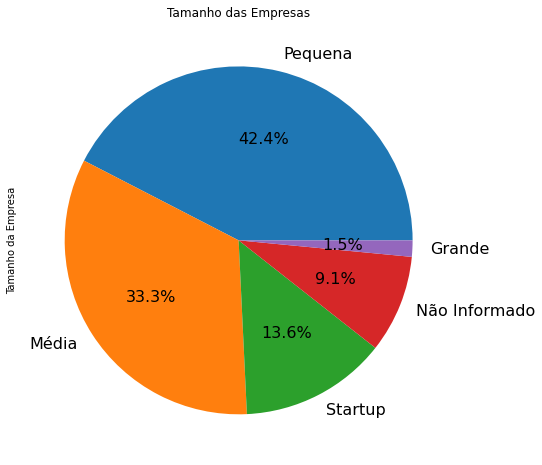

In [ ]:
import matplotlib.pyplot as plt

# Tamanho das Empresas por Autodeclaração 

plt.figure(figsize = (15,8))
dados_teste['Tamanho da Empresa'].fillna('Não Informado').value_counts().plot(kind='pie', title='Tamanho das Empresas', autopct='%1.1f%%', fontsize=16)
plt.savefig('tamanho_empresa_autodeclaração.png')

In [ ]:
dados[dados['Tipo da Etapa Atual'] == 'Final']['Nome da Empresa'].sort_values().to_frame()

,Nome da Empresa
#Processo,
733.0,"ACOSTA AEROESPACO, ENGENHARIA E SERVICOS ESPEC..."
578.0,ACRUX LTDA
849.0,AEROCRISTALDO INDUSTRIA E COMERCIO DE PECAS LTDA
806.0,AMS KEPLER ENGENHARIA DE SISTEMAS LTDA
771.0,ATECH - NEGOCIOS EM TECNOLOGIAS S.A.
702.0,"ATS4I ENGENHARIA, ESTUDOS E PROJETOS LIMITADA"
856.0,AVIBRAS INDUSTRIA AEROESPACIAL S A
810.0,BETA TELECOM CONSULTORIA E COMERCIO LTDA
676.0,BEYOND SPACE INOVA SIMPLES (I.S.)


In [ ]:
empresas_antigas

,Cidade e Estado,Endereço,Descrição da empresa (português),Descrição da empresa (inglês),Produtos e serviços (português),Produtos e serviços (inglês),Slogan da empresa,Ponto de contato (para divulgação e eventos),E-mail,Telefone de contato,Site da empresa,Satélites,Lançadores,Aplicações,Hardware,Software,Infraestrutura,Serviços,Outros
Nome da empresa,,,,,,,,,,,,,,,,,,,
ANDRADE GUTIERREZ ENGENHARIA,"São Paulo, SP","Av. da Nações Unidas, 12.495, 50 andar, Brooklin",Andrade Gutierrez Engenharia é uma empreiteira...,Andrade Gutierrez Engenharia is a Brazilian ge...,A AGE possui uma sólida governança corporativa...,"AGE has a solid corporate governance, managed ...",Engenharia,Ricardo Newton Fortini Pimentel,ricardo.fortini@agnet.com.br,+55 61 3213-5001 | +55 11 5502-2309,www.andradegutierrez.com,NaN,NaN,X,NaN,NaN,X,X,NaN
BeByte Tecnologia Educacional S/A,"São Paulo, SP","Rua Humberto I, 348",A BeByte tem como missão preparar um milhão de...,BeByte’s mission is to prepare one million chi...,Curso de robótica espacial pra jovens: O proje...,Space robotics course for young people: The Sp...,Preparar 1 milhão de jovens para o futuro,Alexandre Rodrigues de Carvalho,me@alexroger.com,+55 61 99911-2539,www.bebyte.com.br,NaN,NaN,NaN,NaN,X,NaN,NaN,NaN
CLAMPER INDÚSTRIA & COMÉRCIO S/A,"Lagoa Santa, MG","Rodovia LMG-800, km 1, 128 - Distrito Industrial","Founded in 1991, CLAMPER is a Brazilian compan...","Founded in 1991, CLAMPER is a Brazilian compan...",Referência mundial quando o assunto é DPS para...,Global reference when it comes to SPD for prot...,Líder e especialista em DPS,Wagner Almeida Barbosa,wagner@clamper.com.br,+55 31 3689-9500,www.clamper.com.br,NaN,NaN,NaN,NaN,X,X,X,NaN
Grauna Aerospace Ltda.,"São José dos Campos, SP","Rua Januaria, 1100","Graúna Aerospace LTDA, fundada em 1990, atua n...","Graúna Aerospace LTDA, founded in 1990, operat...",Usinagem: Expertise na fabricação de peças usi...,Machining: Expertise in the manufacture of mac...,Compliance com os padrões,IRINEU CARPINI FILHO,gepack@uol.com.br,+55 12 3221-3500,www.graunaaerospace.com.br,X,X,NaN,NaN,NaN,NaN,NaN,NaN
HOMEM DO ESPAÇO\n,"Nova Friburgo, RJ",Rua Aristao Pinto 112 - Centro,Empresa de divulgação da História da Exploraçã...,The company is specialised the History of Spac...,Produz renderizações 3D de foguetes e satélite...,Produces 3D renderings of rockets and satellit...,Divulgação científica com ênfase na exatidão t...,Reginaldo Miranda Junior,homemdoespacobr@gmail.com,+55 22 99926-57690,www.homemdoespaco.com,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN
Innalogics Sistemas Computacionais Ltda.,"Florianópolis, SC","Rua Dom Jaime Câmara, 170",Foi criada em 2004 como uma spin-off do GSE da...,It was created in 2004 as a spin-off of the GS...,INL100 - Computador de bordo para micro e nano...,INL100 - On-Board computer for micro and nanos...,Innovation and logics,Gabriel Mariano Marcelino,gabriel.mm8@gmail.com,+ 55 48 99165-1971,www.innalogics.com,X,NaN,X,X,X,X,X,NaN
TROYA,São José dos Campos – SP,"Av. Cesare Mansueto Giulio Lattes, 501",A TROYA é capaz de atender as mais diversas in...,TROYA is able to serve several industries with...,DESENVOLVIMENTO E PRODUÇÃO DE FERRAMENTAL Dese...,TOOLING DEVELOPMENT AND PRODUCTION We develop ...,-,Francilio Graciano,troya@troya.ind.br,+55 12 3935-4100,www.troya.ind.br,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN
VOLUDI,"Caçapava, SP",ROD. João do Amaral Gurgel Km 4.800 – Piedade ...,Voludi é uma empresa de Engenharia e Manufatur...,Voludi is an Engineering and Manufacturing com...,"Especializada no desenvolvimento de soluções, ...","Specialized in solutions development, Turn Key...","Atender melhor, para atender sempre!",Marcus Moura,marcus.moura@voludi.eng.br,+55 12 99685-2346,www.voludi.com.br,NaN,NaN,NaN,NaN,NaN,NaN,X,NaN
WIKKI,"Rio de Janeiro, RJ","Paulo Emídio Barbosa, 485. CETIC, Sala 305",A WIKKI BRASIL acredita no compartilhamento de...,WIKKI BRASIL believes in knowledge sharing and...,• Consultoria em projeto de engenharia aeroesp...,• Aerospace e